
# Life Expectancy & GDP — Data Analysis Portfolio Project

**Author:** Ann-Christin Borchardt (annearcana)  
**Last updated:** 2025-10-28 13:15 UTC

This notebook explores the relationship between **Life Expectancy** and **GDP** across six countries from 2000–2015.  
It is structured for a public GitHub portfolio and is fully reproducible with the provided dataset.

> Dataset expected: `all_data.csv` (columns: `Country`, `Year`, `Life expectancy at birth (years)`, `GDP`).



## Goals

- **State clear goals** for the analysis.
- **Load, validate, and document the dataset.**
- **Analyze** trends and relationships between **GDP** and **Life Expectancy**.
- **Answer key questions:**
  1. Has life expectancy increased over time in the six nations?
  2. Has GDP increased over time in the six nations?
  3. Is there a correlation between GDP and life expectancy of a country?
  4. What is the average life expectancy in these nations?
  5. What is the distribution of that life expectancy?
- Produce publication-ready visuals and **export summary tables** for the repository.


In [58]:

# --- Setup
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid", context="notebook")
sns.set_palette("muted")


In [37]:

# --- Consistent country color palette (used across all plots) ---
palette = {
    "Chile": "#E69F00",
    "China": "#56B4E9",
    "Germany": "#009E73",
    "Mexico": "#F0E442",
    "United States of America": "#0072B2",
    "Zimbabwe": "#D55E00",
}



## Data

> **Note:** This notebook **requires** the real dataset `all_data.csv`.  
> There is **no demo fallback**. All results reflect the real data.


In [38]:

# --- Load data (strict) ---
df = pd.read_csv("all_data.csv")
print(f"Loaded real dataset (rows={len(df)}, cols={df.shape[1]})")
df.head()


Loaded real dataset (rows=96, cols=4)


,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [39]:

# Standardize columns & apply helpful transformations
df = df.rename(columns={"Life expectancy at birth (years)": "LEABY"})
df["Year"] = df["Year"].astype(int)
df["log10_GDP"] = np.log10(df["GDP"])

# Run df.info() silently (suppressing console output)
import io
_ = df.info(buf=io.StringIO())

# Display descriptive statistics
display(df.describe(include="all"))

# Display a quick summary of dataset scope
display(pd.DataFrame({
    "n_rows": [len(df)],
    "n_countries": [df['Country'].nunique()],
    "years_min": [df['Year'].min()],
    "years_max": [df['Year'].max()]
}))


,Country,Year,LEABY,GDP,log10_GDP
count,96,96.000000,96.000000,9.600000e+01,96.000000
unique,6,NaN,NaN,NaN,NaN
top,Chile,NaN,NaN,NaN,NaN
freq,16,NaN,NaN,NaN,NaN
mean,NaN,2007.500000,72.789583,3.880499e+12,11.879120
std,NaN,4.633971,10.672882,5.197561e+12,1.087501
min,NaN,2000.000000,44.300000,4.415703e+09,9.645000
25%,NaN,2003.750000,74.475000,1.733018e+11,11.238801
50%,NaN,2007.500000,76.750000,1.280220e+12,12.107241
75%,NaN,2011.250000,78.900000,4.067510e+12,12.608160


,n_rows,n_countries,years_min,years_max
0,96,6,2000,2015


### Data validation

In [40]:

dups = df.duplicated(subset=["Country","Year"]).sum()
na_table = df.isna().sum().to_frame("n_missing")
coverage = df.groupby("Country")["Year"].agg(["min","max","nunique"]).rename(columns={"nunique":"n_years"})
print(f"Duplicate rows by (Country,Year): {dups}")
display(na_table)
display(coverage)


Duplicate rows by (Country,Year): 0


,n_missing
Country,0
Year,0
LEABY,0
GDP,0
log10_GDP,0


,min,max,n_years
Country,,,
Chile,2000,2015,16
China,2000,2015,16
Germany,2000,2015,16
Mexico,2000,2015,16
United States of America,2000,2015,16
Zimbabwe,2000,2015,16



## Analysis

We address the core questions with visual and statistical methods:
1) **Has life expectancy increased over time in the six nations?**  
2) **Has GDP increased over time in the six nations?**  
3) **Is there a correlation between GDP and life expectancy of a country?**  
4) **What is the average life expectancy in these nations?**  
5) **What is the distribution of that life expectancy?**


### 1) Life expectancy over time

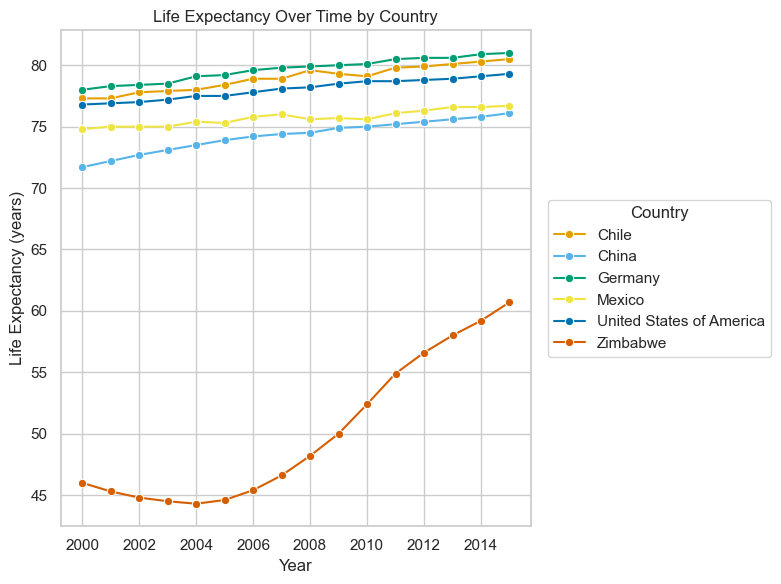

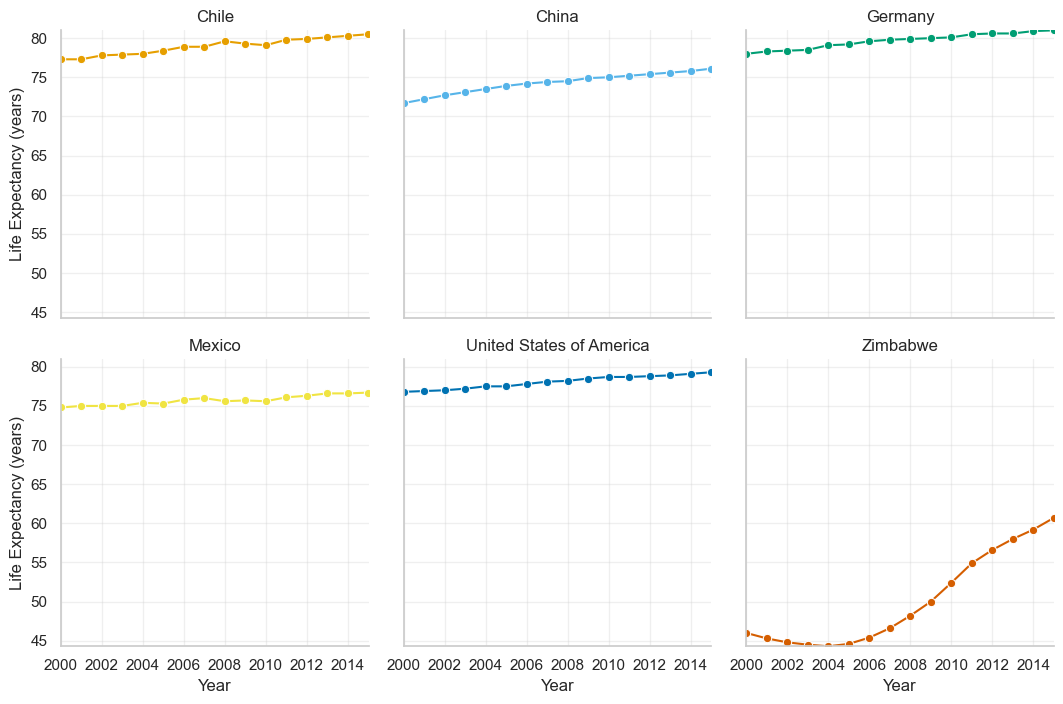

In [55]:
# --- Overall Life Expectancy Trend by Country (single legend) ---
plt.figure(figsize=(8,6))
sns.lineplot(
    data=df, x="Year", y="LEABY",
    hue="Country", palette=palette, marker="o"
)
plt.title("Life Expectancy Over Time by Country")
plt.xlabel("Year")
plt.ylabel("Life Expectancy (years)")
plt.legend(title="Country", bbox_to_anchor=(1.02, 0.5), loc="center left")
plt.tight_layout()
plt.show()  # <- ensures this figure renders before the facets


# --- Country-specific facets with unified axes and explicit 2015 tick ---
from matplotlib.ticker import FixedLocator, StrMethodFormatter

year_min = int(df["Year"].min())
year_max = 2015
y_min = float(df["LEABY"].min())
y_max = float(df["LEABY"].max())
ticks = np.arange(year_min, year_max + 1, 2)

# relplot creates its own figure; legend disabled for facets
g = sns.relplot(
    data=df, kind="line",
    x="Year", y="LEABY",
    hue="Country", palette=palette, legend=False,
    col="Country", col_wrap=3, height=3.6,
    marker="o"
)

# Uniform axes and ticks; tiny pad keeps the 2015 label visible
g.set(xlim=(year_min, year_max + 0.01), ylim=(y_min, y_max))
g.set_axis_labels("Year", "Life Expectancy (years)")
g.set_titles("{col_name}")

for ax in g.axes.flat:
    ax.xaxis.set_major_locator(FixedLocator(ticks))
    ax.xaxis.set_major_formatter(StrMethodFormatter("{x:.0f}"))
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### 2) GDP over time

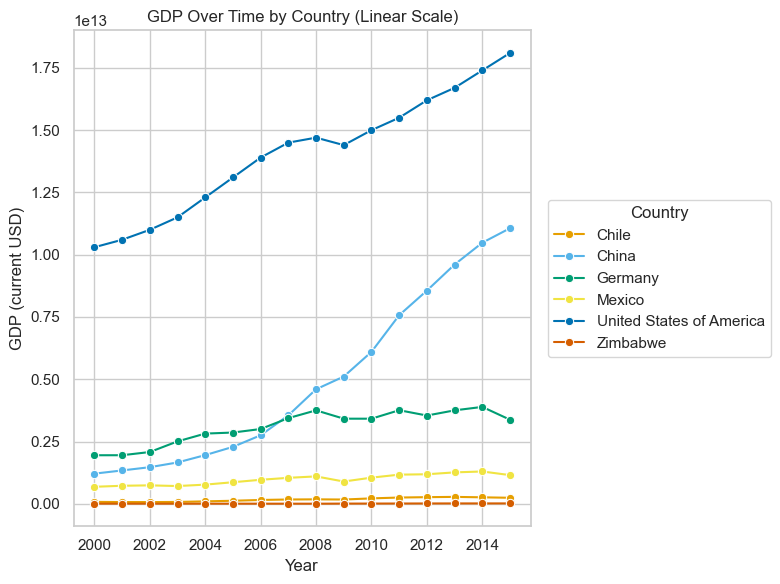

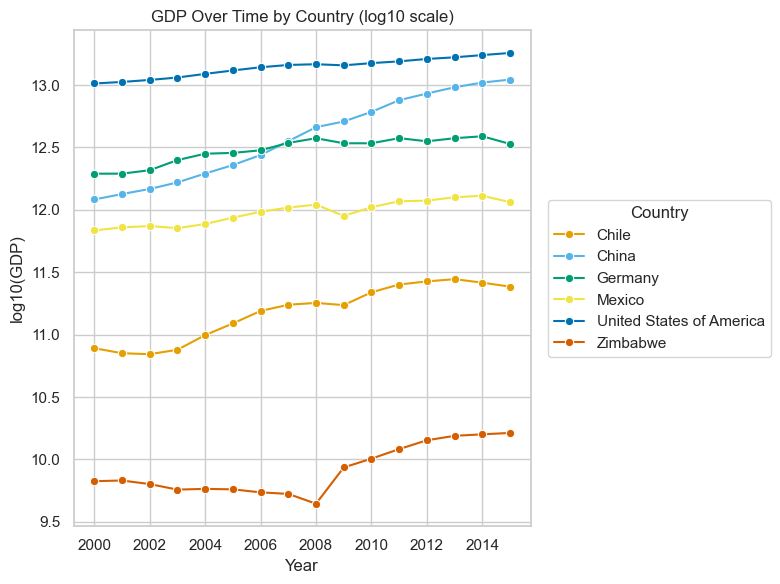

In [42]:

plt.figure(figsize=(8,6))
sns.lineplot(data=df, x="Year", y="GDP", hue="Country", palette=palette, marker="o")
plt.title("GDP Over Time by Country (Linear Scale)")
plt.xlabel("Year"); plt.ylabel("GDP (current USD)")
plt.legend(title="Country", bbox_to_anchor=(1.02,0.5), loc="center left")
plt.tight_layout(); plt.show()

plt.figure(figsize=(8,6))
sns.lineplot(data=df, x="Year", y="log10_GDP", hue="Country", palette=palette, marker="o")
plt.title("GDP Over Time by Country (log10 scale)")
plt.xlabel("Year"); plt.ylabel("log10(GDP)")
plt.legend(title="Country", bbox_to_anchor=(1.02,0.5), loc="center left")
plt.tight_layout(); plt.show()


### 3) Correlation between GDP and Life Expectancy

Overall Pearson r(LEABY, log10_GDP): 0.787
Overall Spearman ρ(LEABY, log10_GDP): 0.447


,Country,Pearson_r,Spearman_rho,n
4,United States of America,0.981077,0.989692,16
1,China,0.972694,1.000000,16
0,Chile,0.954984,0.927836,16
5,Zimbabwe,0.940777,0.752941,16
3,Mexico,0.928966,0.918768,16
2,Germany,0.927164,0.844739,16


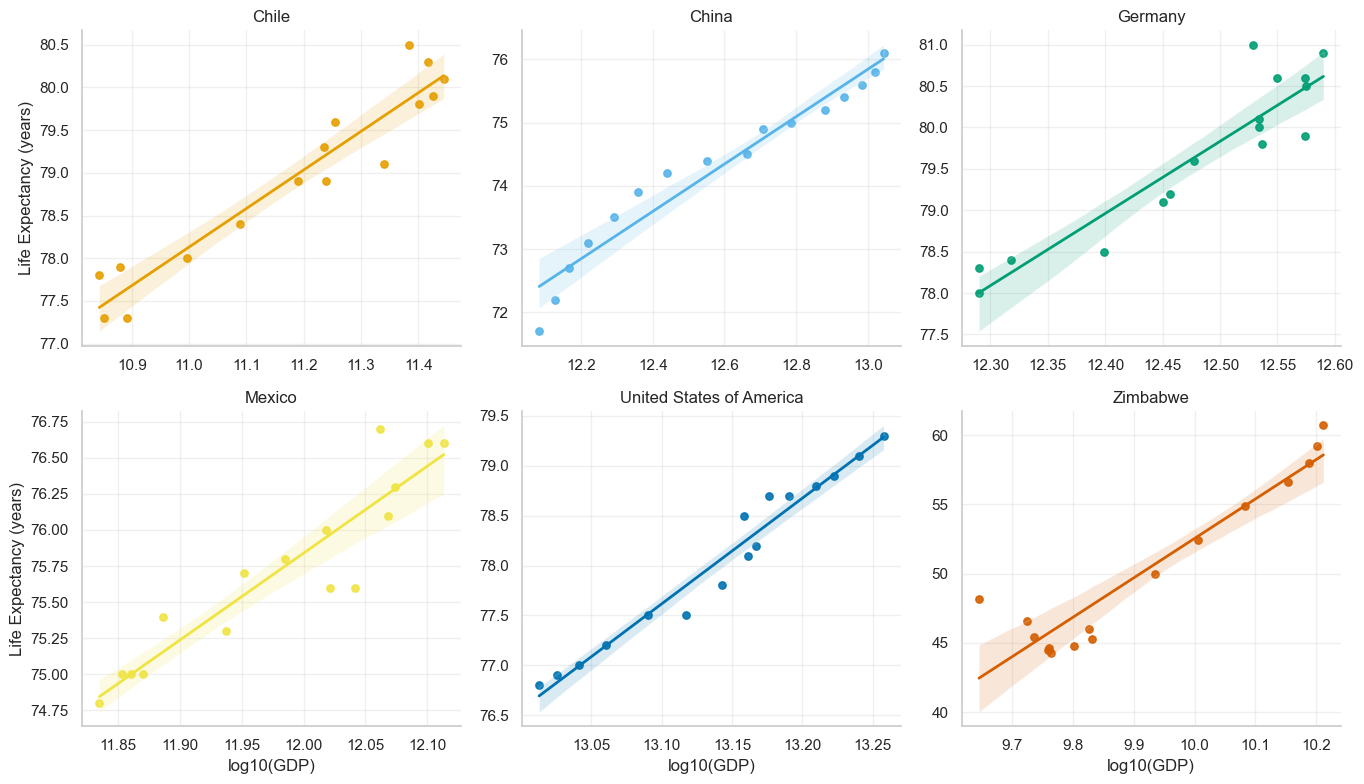

In [56]:

# --- 3) Correlation between GDP and Life Expectancy ---

pearson_all = df[["LEABY","log10_GDP"]].corr(method="pearson").iloc[0,1]
spearman_all = df[["LEABY","log10_GDP"]].corr(method="spearman").iloc[0,1]
print(f"Overall Pearson r(LEABY, log10_GDP): {pearson_all:.3f}")
print(f"Overall Spearman ρ(LEABY, log10_GDP): {spearman_all:.3f}")

by_country = []
for c, sub in df.groupby("Country"):
    p = sub[["LEABY","log10_GDP"]].corr(method="pearson").iloc[0,1]
    s = sub[["LEABY","log10_GDP"]].corr(method="spearman").iloc[0,1]
    by_country.append({"Country": c, "Pearson_r": p, "Spearman_rho": s, "n": len(sub)})

corr_table = pd.DataFrame(by_country).sort_values("Pearson_r", ascending=False)
display(corr_table)

os.makedirs("artifacts", exist_ok=True)
corr_table.to_csv("artifacts/correlation_by_country.csv", index=False)

# Per-country regression with country color — give each facet its own axes
g = sns.lmplot(
    data=df, x="log10_GDP", y="LEABY",
    col="Country", col_wrap=3,
    height=4, aspect=1.15,                # bigger panels
    hue="Country", palette=palette,
    scatter_kws={"s":28, "alpha":0.9},     # slightly smaller points
    line_kws={"lw":2},
    facet_kws={"sharex": False, "sharey": False}  # <- key change
)

g.set_axis_labels("log10(GDP)", "Life Expectancy (years)")
g.set_titles("{col_name}")

# add small margins so points don't hug the frame
for ax in g.axes.flat:
    ax.margins(x=0.05, y=0.05)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### 4) Average life expectancy & 5) Distribution

,Country,LEABY_mean,GDP_mean
2,Germany,79.65625,3.094776e+12
0,Chile,78.94375,1.697888e+11
4,United States of America,78.06250,1.407500e+13
3,Mexico,75.71875,9.766506e+11
1,China,74.26250,4.957714e+12
5,Zimbabwe,50.09375,9.062580e+09


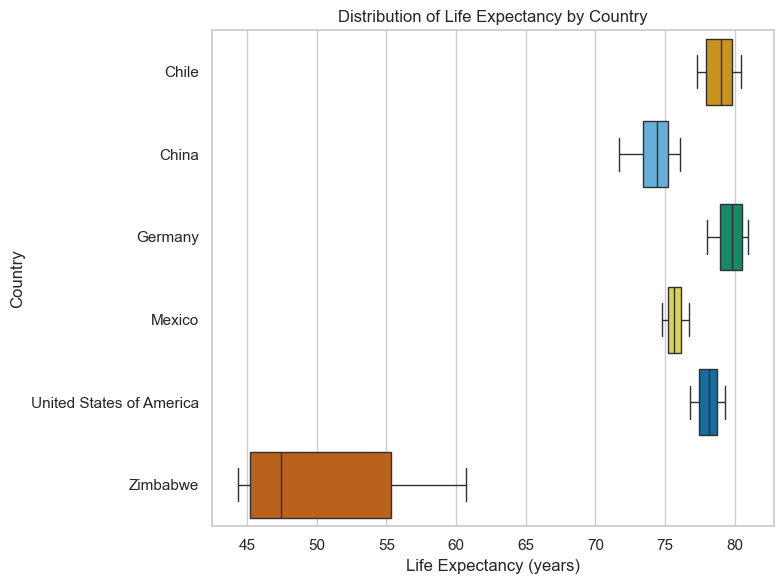

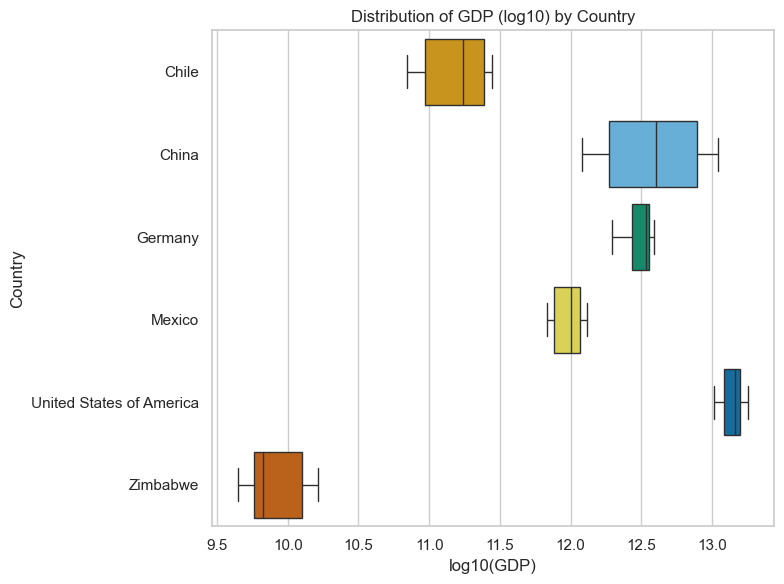

In [44]:

# --- Compute means per country ---
means = (
    df.drop(columns=["Year"])
      .groupby("Country", as_index=False)
      .agg(LEABY_mean=("LEABY", "mean"),
           GDP_mean=("GDP", "mean"))
)
display(means.sort_values("LEABY_mean", ascending=False))
means.to_csv("artifacts/means_by_country.csv", index=False)

# --- Boxplot: Life Expectancy ---
plt.figure(figsize=(8,6))
sns.boxplot(
    data=df,
    x="LEABY", y="Country",
    hue="Country", palette=palette, legend=False
)
plt.title("Distribution of Life Expectancy by Country")
plt.xlabel("Life Expectancy (years)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

# --- Boxplot: GDP (log10) ---
plt.figure(figsize=(8,6))
sns.boxplot(
    data=df,
    x="log10_GDP", y="Country",
    hue="Country", palette=palette, legend=False
)
plt.title("Distribution of GDP (log10) by Country")
plt.xlabel("log10(GDP)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


### (Optional) Distribution overlays

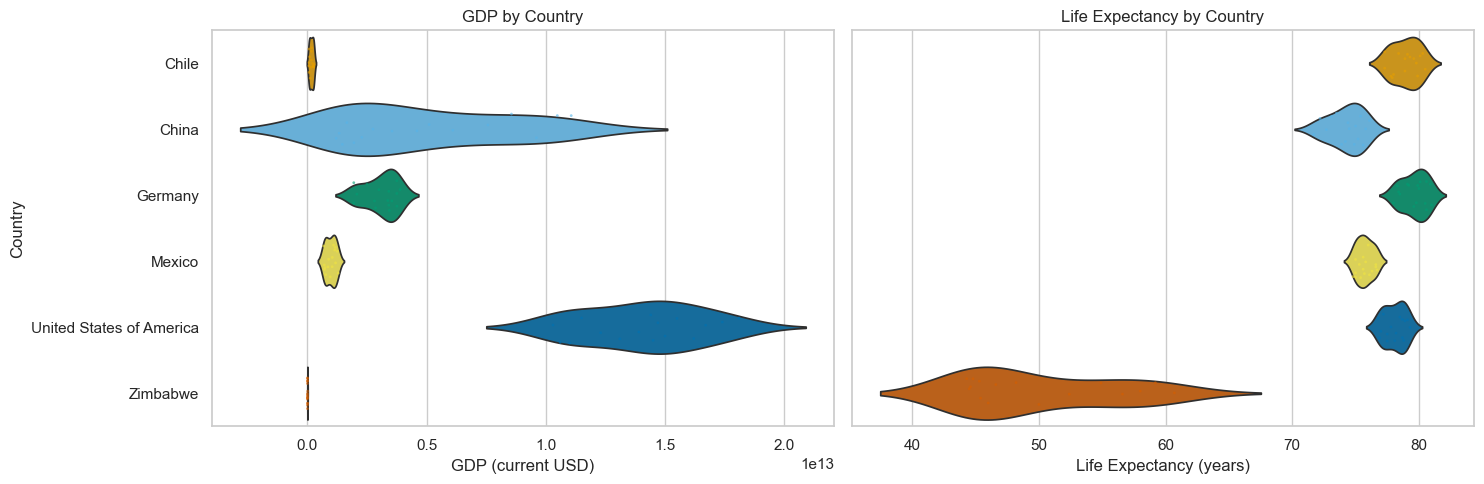

In [45]:

# --- (Optional) Distribution overlays ---

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))

# GDP distribution
sns.violinplot(
    ax=axes[0], data=df,
    x="GDP", y="Country",
    hue="Country", palette=palette, legend=False, inner=None
)
sns.stripplot(
    ax=axes[0], data=df,
    x="GDP", y="Country",
    hue="Country", palette=palette,
    jitter=0.25, size=2, alpha=0.6, legend=False
)
axes[0].set_xlabel("GDP (current USD)")
axes[0].set_title("GDP by Country")

# Life Expectancy distribution
sns.violinplot(
    ax=axes[1], data=df,
    x="LEABY", y="Country",
    hue="Country", palette=palette, legend=False, inner=None
)
sns.stripplot(
    ax=axes[1], data=df,
    x="LEABY", y="Country",
    hue="Country", palette=palette,
    jitter=0.25, size=2, alpha=0.6, legend=False
)
axes[1].set_xlabel("Life Expectancy (years)")
axes[1].set_title("Life Expectancy by Country")

plt.tight_layout()
plt.show()



## Answers to the Key Questions
These answers are computed from the dataset so they automatically refresh when you replace or update `all_data.csv`.


In [46]:

from IPython.display import Markdown, display
from scipy.stats import linregress

def slope_verdict(x, y):
    res = linregress(x, y)
    s = res.slope
    return s, ("⬆️ increasing" if s>0 else "⬇️ decreasing" if s<0 else "→ flat")

# Q1 — Life expectancy trend per country
le_rows = []
for c, sub in df.groupby("Country"):
    s, v = slope_verdict(sub['Year'], sub['LEABY'])
    le_rows.append({"Country": c, "LEABY_slope_per_year": s, "Verdict": v})
le_df = pd.DataFrame(le_rows).sort_values("LEABY_slope_per_year", ascending=False)

# Q2 — GDP trend per country (log10 scale)
gdp_rows = []
for c, sub in df.groupby("Country"):
    s, v = slope_verdict(sub['Year'], sub['log10_GDP'])
    gdp_rows.append({"Country": c, "log10_GDP_slope_per_year": s, "Verdict": v})
gdp_df = pd.DataFrame(gdp_rows).sort_values("log10_GDP_slope_per_year", ascending=False)

# Q3 — Correlation per country
def corr_word(r):
    if r >= 0.6: return "strong +"
    if r >= 0.3: return "moderate +"
    if r >  0.1: return "weak +"
    if r <= -0.6: return "strong −"
    if r <= -0.3: return "moderate −"
    if r <  -0.1: return "weak −"
    return "~ none"

corr_records = []
for c, sub in df.groupby("Country"):
    pear = sub[['LEABY','log10_GDP']].corr(method='pearson').iloc[0,1]
    spear = sub[['LEABY','log10_GDP']].corr(method='spearman').iloc[0,1]
    corr_records.append({"Country": c,
                         "Pearson_r": pear, "Pearson_eval": corr_word(pear),
                         "Spearman_rho": spear, "Spearman_eval": corr_word(spear)})
corr_df = pd.DataFrame(corr_records).sort_values("Pearson_r", ascending=False)

# Q4 — Averages
avg_df = (df.groupby("Country", as_index=False)["LEABY"]
            .mean().rename(columns={"LEABY":"LEABY_mean"})
            .sort_values("LEABY_mean", ascending=False))
overall_mean = df["LEABY"].mean()
overall_median = df["LEABY"].median()

# Q5 — Distribution
q1, q3 = df["LEABY"].quantile([0.25, 0.75])
iqr = q3 - q1

display(Markdown("### Q1 — Has life expectancy increased over time?"))
display(le_df)

display(Markdown("### Q2 — Has GDP increased over time? (log10 scale)"))
display(gdp_df)

display(Markdown("### Q3 — Is there a correlation between GDP and life expectancy?"))
display(corr_df)

display(Markdown("### Q4 — What is the average life expectancy?"))
display(avg_df)
display(Markdown(f"**Overall:** mean {overall_mean:.2f} years; median {overall_median:.2f} years"))

display(Markdown("### Q5 — What is the distribution of that life expectancy?"))
display(pd.DataFrame({
    "stat": ["min","Q1","median","Q3","max","mean","std","IQR"],
    "value": [df['LEABY'].min(), q1, overall_median, q3, df['LEABY'].max(),
              overall_mean, df['LEABY'].std(), iqr]
}))


### Q1 — Has life expectancy increased over time?

,Country,LEABY_slope_per_year,Verdict
5,Zimbabwe,1.152794,⬆️ increasing
1,China,0.272059,⬆️ increasing
0,Chile,0.218088,⬆️ increasing
2,Germany,0.202206,⬆️ increasing
4,United States of America,0.173529,⬆️ increasing
3,Mexico,0.123971,⬆️ increasing


### Q2 — Has GDP increased over time? (log10 scale)

,Country,log10_GDP_slope_per_year,Verdict
1,China,0.071426,⬆️ increasing
0,Chile,0.044909,⬆️ increasing
5,Zimbabwe,0.032959,⬆️ increasing
2,Germany,0.019286,⬆️ increasing
3,Mexico,0.018884,⬆️ increasing
4,United States of America,0.015961,⬆️ increasing


### Q3 — Is there a correlation between GDP and life expectancy?

,Country,Pearson_r,Pearson_eval,Spearman_rho,Spearman_eval
4,United States of America,0.981077,strong +,0.989692,strong +
1,China,0.972694,strong +,1.000000,strong +
0,Chile,0.954984,strong +,0.927836,strong +
5,Zimbabwe,0.940777,strong +,0.752941,strong +
3,Mexico,0.928966,strong +,0.918768,strong +
2,Germany,0.927164,strong +,0.844739,strong +


### Q4 — What is the average life expectancy?

,Country,LEABY_mean
2,Germany,79.65625
0,Chile,78.94375
4,United States of America,78.06250
3,Mexico,75.71875
1,China,74.26250
5,Zimbabwe,50.09375


**Overall:** mean 72.79 years; median 76.75 years

### Q5 — What is the distribution of that life expectancy?

,stat,value
0,min,44.300000
1,Q1,74.475000
2,median,76.750000
3,Q3,78.900000
4,max,81.000000
5,mean,72.789583
6,std,10.672882
7,IQR,4.425000



## Findings (Executive Summary)

Life expectancy and GDP increased in all six countries.
Chile and China show strong, steady progress; Germany and the U.S. have high but plateauing levels; Mexico advances moderately; Zimbabwe recovers rapidly from a low base.
Overall, higher GDP aligns with longer life expectancy, though the strength of this link differs by nation.


## Conclusions

The results confirm that economic growth and population health moved upward together, yet at unequal speeds.
Developed nations show steady but slowing gains, while emerging ones display rapid, sometimes volatile improvements.
The findings align with global trends: rising life expectancy, expanding GDP, and a positive—but not uniform—relationship between wealth and health.


## How to Run Locally

1. Place `all_data.csv` next to this notebook (same folder).  
2. Create a virtual environment and install dependencies:
   ```bash
   python -m venv .venv
   source .venv/bin/activate  # Windows: .venv\Scripts\activate
   pip install -r requirements.txt
   ```
3. Open Jupyter and run all cells:
   ```bash
   jupyter notebook
   ```

### Repo Structure (suggested)
```
.
├── life_expectancy_gdp.ipynb
├── all_data.csv
├── artifacts/
│   ├── correlation_by_country.csv
│   ├── means_by_country.csv
│   └── trend_slopes_by_country.csv
└── requirements.txt
```


In [47]:

# Write a minimal requirements.txt for reproducibility
reqs = '''pandas>=2.0
numpy>=1.24
matplotlib>=3.7
seaborn>=0.13
scipy>=1.11
'''
with open("requirements.txt","w") as f:
    f.write(reqs)
print("requirements.txt written")


requirements.txt written



## Data Sources

- **GDP Source:** [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.  
- **Life expectancy Data Source:** [World Health Organization](http://apps.who.int/gho/data/node.main.688)



## Attribution & License

- Educational project inspired by common **GDP vs. Life Expectancy** exercises (e.g., Codecademy/WHO/World Bank-style datasets).  
- Notebook © 2025 Ann-Christin Borchardt. You may **view and learn** from this notebook.  
  For re-use, please provide attribution.

> Ensure you have rights to redistribute the underlying dataset (or link to the original source).
